<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass7/hpdp/KOKONAT/library_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 7: Comparison between libraries <a href="https://colab.research.google.com/drive/1uy_bxY__EZpArqrP7g84iTayEudb5zQX?usp=sharing"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
### Library : **PySpark**
### Group Name : KOKONAT
### Group Members

| Name                                     | Matrix Number | Task |
| :---------------------------------------- | :-------------: | ------------- |
|NG SUANG JOO        | A21EC0102     | Pandas  |
|LING WAN YIN         | A21EC0047     | DataTable  |
|FONG KHAH KHEH         | A21EC0026   | Pyspark   |

# About Dataset

In this project, we delve into a robust dataset covering the complex world of craft beer production, exploring in detail brewing parameters, sales trends and quality metrics for the period January 2020 to January 2024.

Synthesised for educational, analytical and modelling purposes, this dataset is an invaluable asset for a wide range of professionals in the brewing industry, including data scientists, brewing process engineers, market analysts, supply chain experts and quality control professionals.

In embarking on this quest, we aimed to compare and contrast the capabilities of three powerful data processing libraries - Pandas, Data Table, and PySpark - in dealing with the complexity of this massive dataset. By utilising these tools, we aim to optimise the brewing process, identify market trends, streamline supply chain management and enhance quality control measures.

## Downloading the Dataset

Please use the link below to access the dataset:

[Brewery Operations and Market Analysis Dataset](https://www.kaggle.com/datasets/ankurnapa/brewery-operations-and-market-analysis-dataset)



###Upload Kaggle API Token


In [1]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


### Download and Unzip Dataset

In [2]:
# Move the uploaded kaggle.json file to the required directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download using the Kaggle API
!kaggle datasets download -d ankurnapa/brewery-operations-and-market-analysis-dataset

 99% 1.05G/1.06G [00:11<00:00, 70.4MB/s]
100% 1.06G/1.06G [00:11<00:00, 96.7MB/s]


In [3]:
 # unzip the dataset
!unzip brewery-operations-and-market-analysis-dataset

Archive:  brewery-operations-and-market-analysis-dataset.zip
  inflating: brewery_data_complete_extended.csv  


The dataset has been downloaded and extracted.

## Data Preparation and Cleaning




### Installing Pyspark

In [4]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=efd1b72b3c3b5c7666f16842602eb28ee63350717b3de1fc1a5d1afe1b01eb87
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


### Import necessary PySpark modules

In [5]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import pyspark.sql.functions as F
from pyspark.sql.types import StringType, DoubleType

### Load the dataset

In [6]:
from pyspark.sql import SparkSession
import timeit
import psutil

# Create a Spark session
spark = SparkSession.builder.appName("BreweryAnalysis").getOrCreate()

def load_data():
    # Load the data
    brewery_df = spark.read.csv("brewery_data_complete_extended.csv", header=True, inferSchema=True)
    return brewery_df

# Measure memory usage and computation time
start_time = timeit.default_timer()

# Load the data
brewery_df = load_data()

end_time = timeit.default_timer()
loss_time = end_time - start_time
memory = psutil.Process()
loss_memory = memory.memory_info().rss / (1024 ** 2)

print("\nMemory usage:", loss_memory, "MB")
print("Computation Time:", loss_time, "seconds")



Memory usage: 100.5078125 MB
Computation Time: 140.73639969700002 seconds


### Show the schema and first few rows of the DataFrame

In [9]:
import time
import psutil
# Measure memory usage and computation time
start_time = time.time()

# Print the schema
brewery_df.printSchema()

# Show the first 5 rows without truncating column values
brewery_df.show(5, truncate=False)

end_time = time.time()
loss_time = end_time - start_time
memory = psutil.Process()
loss_memory = memory.memory_info().rss / (1024 ** 2)

print("\nMemory usage:", loss_memory, "MB")
print("Computation Time:", loss_time, "seconds")


root
 |-- Batch_ID: integer (nullable = true)
 |-- Brew_Date: timestamp (nullable = true)
 |-- Beer_Style: string (nullable = true)
 |-- SKU: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Fermentation_Time: integer (nullable = true)
 |-- Temperature: double (nullable = true)
 |-- pH_Level: double (nullable = true)
 |-- Gravity: double (nullable = true)
 |-- Alcohol_Content: double (nullable = true)
 |-- Bitterness: integer (nullable = true)
 |-- Color: integer (nullable = true)
 |-- Ingredient_Ratio: string (nullable = true)
 |-- Volume_Produced: integer (nullable = true)
 |-- Total_Sales: double (nullable = true)
 |-- Quality_Score: double (nullable = true)
 |-- Brewhouse_Efficiency: double (nullable = true)
 |-- Loss_During_Brewing: double (nullable = true)
 |-- Loss_During_Fermentation: double (nullable = true)
 |-- Loss_During_Bottling_Kegging: double (nullable = true)

+--------+-------------------+----------+----+------------+-----------------+------------

### Explore the number of rows & columns

In [10]:
import time
import psutil
# Measure memory usage and computation time
start_time = time.time()

num_rows = brewery_df.count()
num_columns = len(brewery_df.columns)
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")


end_time = time.time()
loss_time = end_time - start_time
memory = psutil.Process()
loss_memory = memory.memory_info().rss / (1024 ** 2)

print("\nMemory usage:", loss_memory, "MB")
print("Computation Time:", loss_time, "seconds")

Number of Rows: 10000000
Number of Columns: 20

Memory usage: 115.92578125 MB
Computation Time: 5.4734203815460205 seconds


### Ranges of values

In [11]:
import time
import psutil
# Measure memory usage and computation time
start_time = time.time()

numerical_columns = [col_name for col_name, data_type in brewery_df.dtypes if data_type in ['int', 'double']]
for column in numerical_columns:
    min_value = brewery_df.agg({column: "min"}).collect()[0][0]
    max_value = brewery_df.agg({column: "max"}).collect()[0][0]
    print(f"Range of values for {column}: {min_value} to {max_value}")


end_time = time.time()
loss_time = end_time - start_time
memory = psutil.Process()
loss_memory = memory.memory_info().rss / (1024 ** 2)

print("\nMemory usage:", loss_memory, "MB")
print("Computation Time:", loss_time, "seconds")

Range of values for Batch_ID: 0 to 9999999
Range of values for Fermentation_Time: 10 to 19
Range of values for Temperature: 15.000001163771435 to 24.999998289887966
Range of values for pH_Level: 4.500000005935603 to 5.499999818305633
Range of values for Gravity: 1.0300000027891478 to 1.0799999980323736
Range of values for Alcohol_Content: 4.500000235642255 to 5.999999932506248
Range of values for Bitterness: 20 to 59
Range of values for Color: 5 to 19
Range of values for Volume_Produced: 500 to 4999
Range of values for Total_Sales: 1000.0009630942443 to 19999.99964105241
Range of values for Quality_Score: 6.000000644037316 to 9.999998860537378
Range of values for Brewhouse_Efficiency: 70.00000702282782 to 89.99999982126904
Range of values for Loss_During_Brewing: 1.000000399567285 to 4.999999841589812
Range of values for Loss_During_Fermentation: 1.0000008690556794 to 4.999999816405875
Range of values for Loss_During_Bottling_Kegging: 1.0000002095815321 to 4.999999721589095

Memory usa

### Handle missing, incorrect and invalid data

In [12]:
import time
import psutil
# Measure memory usage and computation time
start_time = time.time()

# Check for missing values
missing_values = brewery_df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in brewery_df.columns])
missing_values.show()


end_time = time.time()
loss_time = end_time - start_time
memory = psutil.Process()
loss_memory = memory.memory_info().rss / (1024 ** 2)

print("\nMemory usage:", loss_memory, "MB")
print("Computation Time:", loss_time, "seconds")

+--------+---------+----------+---+--------+-----------------+-----------+--------+-------+---------------+----------+-----+----------------+---------------+-----------+-------------+--------------------+-------------------+------------------------+----------------------------+
|Batch_ID|Brew_Date|Beer_Style|SKU|Location|Fermentation_Time|Temperature|pH_Level|Gravity|Alcohol_Content|Bitterness|Color|Ingredient_Ratio|Volume_Produced|Total_Sales|Quality_Score|Brewhouse_Efficiency|Loss_During_Brewing|Loss_During_Fermentation|Loss_During_Bottling_Kegging|
+--------+---------+----------+---+--------+-----------------+-----------+--------+-------+---------------+----------+-----+----------------+---------------+-----------+-------------+--------------------+-------------------+------------------------+----------------------------+
|       0|        0|         0|  0|       0|                0|          0|       0|      0|              0|         0|    0|               0|              0|      

### Column type

In [8]:
import time
import psutil

# Measure memory usage and computation time
start_time = time.time()

# Get column types
column_types = brewery_df.dtypes

# Print column types
print("Column Types:")
for col_name, col_type in column_types:
    print(f"{col_name}: {col_type}")

end_time = time.time()
loss_time = end_time - start_time
memory = psutil.Process()
loss_memory = memory.memory_info().rss / (1024 ** 2)

print("\nMemory usage:", loss_memory, "MB")
print("Computation Time:", loss_time, "seconds")

Column Types:
Batch_ID: int
Brew_Date: timestamp
Beer_Style: string
SKU: string
Location: string
Fermentation_Time: int
Temperature: double
pH_Level: double
Gravity: double
Alcohol_Content: double
Bitterness: int
Color: int
Ingredient_Ratio: string
Volume_Produced: int
Total_Sales: double
Quality_Score: double
Brewhouse_Efficiency: double
Loss_During_Brewing: double
Loss_During_Fermentation: double
Loss_During_Bottling_Kegging: double

Memory usage: 100.83203125 MB
Computation Time: 0.01815199851989746 seconds


### Number of unique values per columns

In [11]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, approx_count_distinct
import time
import psutil

# Measure memory usage and computation time
start_time = time.time()

# Assuming you have a PySpark DataFrame named brewery_df
unique_values = [(column, brewery_df.select(approx_count_distinct(column)).collect()[0][0]) for column in brewery_df.columns]

# Print number of unique values per column
print("\nNumber of Unique Values per Column:")
for col_name, unique_count in unique_values:
    print(f"{col_name}: {unique_count}")


end_time = time.time()
loss_time = end_time - start_time
memory = psutil.Process()
loss_memory = memory.memory_info().rss / (1024 ** 2)

print("\nMemory usage:", loss_memory, "MB")
print("Computation Time:", loss_time, "seconds")



Number of Unique Values per Column:
Batch_ID: 9778944
Brew_Date: 9948483
Beer_Style: 8
SKU: 4
Location: 10
Fermentation_Time: 10
Temperature: 10046331
pH_Level: 9735906
Gravity: 9694671
Alcohol_Content: 9838909
Bitterness: 41
Color: 15
Ingredient_Ratio: 618
Volume_Produced: 4418
Total_Sales: 10432300
Quality_Score: 10192603
Brewhouse_Efficiency: 10716850
Loss_During_Brewing: 10647800
Loss_During_Fermentation: 9840959
Loss_During_Bottling_Kegging: 9811472

Memory usage: 116.2578125 MB
Computation Time: 584.2389488220215 seconds


### Convert 'Brew_Date' to datetime format

Since the 'Brew_Date' is timestamp type, to parse it, we convert it to datetime type.

In [13]:
import time
import psutil
from pyspark.sql.functions import col, to_date

# Measure memory usage and computation time
start_time = time.time()

brewery_df = brewery_df.withColumn("Brew_Date", to_date(col("Brew_Date"), "MM/dd/yyyy"))
brewery_df.show()


end_time = time.time()
loss_time = end_time - start_time
memory = psutil.Process()
loss_memory = memory.memory_info().rss / (1024 ** 2)

print("\nMemory usage:", loss_memory, "MB")
print("Computation Time:", loss_time, "seconds")

+--------+----------+----------+-------+---------------+-----------------+------------------+------------------+------------------+-----------------+----------+-----+----------------+---------------+------------------+-----------------+--------------------+-------------------+------------------------+----------------------------+
|Batch_ID| Brew_Date|Beer_Style|    SKU|       Location|Fermentation_Time|       Temperature|          pH_Level|           Gravity|  Alcohol_Content|Bitterness|Color|Ingredient_Ratio|Volume_Produced|       Total_Sales|    Quality_Score|Brewhouse_Efficiency|Loss_During_Brewing|Loss_During_Fermentation|Loss_During_Bottling_Kegging|
+--------+----------+----------+-------+---------------+-----------------+------------------+------------------+------------------+-----------------+----------+-----+----------------+---------------+------------------+-----------------+--------------------+-------------------+------------------------+----------------------------+
| 78

## Exploratory Analysis and Visualization

**PySpark** is the Python API for Apache Spark, a powerful open-source distributed computing system. Apache Spark is designed for fast and flexible large-scale data processing and analytics. It provides high-level APIs in Java, Scala, Python, and R, making it accessible to a wide range of developers and data scientists.



### Import necessary libraries

In [14]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

import matplotlib.pyplot as plt
import seaborn as sns

### Generate Summary Statistics

In [15]:
import time
import psutil
# Measure memory usage and computation time
start_time = time.time()


brewery_df.describe().show()

end_time = time.time()
loss_time = end_time - start_time
memory = psutil.Process()
loss_memory = memory.memory_info().rss / (1024 ** 2)

print("\nMemory usage:", loss_memory, "MB")
print("Computation Time:", loss_time, "seconds")

+-------+------------------+----------+--------+---------------+-----------------+------------------+-------------------+--------------------+-------------------+------------------+-----------------+----------------+-----------------+------------------+------------------+--------------------+-------------------+------------------------+----------------------------+
|summary|          Batch_ID|Beer_Style|     SKU|       Location|Fermentation_Time|       Temperature|           pH_Level|             Gravity|    Alcohol_Content|        Bitterness|            Color|Ingredient_Ratio|  Volume_Produced|       Total_Sales|     Quality_Score|Brewhouse_Efficiency|Loss_During_Brewing|Loss_During_Fermentation|Loss_During_Bottling_Kegging|
+-------+------------------+----------+--------+---------------+-----------------+------------------+-------------------+--------------------+-------------------+------------------+-----------------+----------------+-----------------+------------------+-----------

### Total Volume Produced by Beer Style

In [16]:
import time
import psutil
from pyspark.sql.functions import sum

# Measure memory usage and computation time
start_time = time.time()
# Group by beer style and calculate the total volume produced
total_volume_by_style = brewery_df.groupBy("Beer_Style").agg(sum("Volume_Produced").alias("Total_Volume_Produced"))

# Show the result
total_volume_by_style.show()

end_time = time.time()
loss_time = end_time - start_time
memory = psutil.Process()
loss_memory = memory.memory_info().rss / (1024 ** 2)

print("\nMemory usage:", loss_memory, "MB")
print("Computation Time:", loss_time, "seconds")

+----------+---------------------+
|Beer_Style|Total_Volume_Produced|
+----------+---------------------+
|    Porter|           3437816327|
|      Sour|           3432995872|
|     Lager|           3437866881|
|Wheat Beer|           3433405382|
|   Pilsner|           3435554213|
|       Ale|           3438491666|
|     Stout|           3436714200|
|       IPA|           3437465053|
+----------+---------------------+


Memory usage: 201.609375 MB
Computation Time: 15.084449291229248 seconds


### Average Fermentation Time by Beer Style

In [17]:
import time
import psutil
from pyspark.sql.functions import avg

# Measure memory usage and computation time
start_time = time.time()

average_fermentation_time_by_style = (
    brewery_df.groupBy("Beer_Style")
    .agg(avg("Fermentation_Time").alias("Average_Fermentation_Time"))
)

# Show the result
average_fermentation_time_by_style.show()

end_time = time.time()
loss_time = end_time - start_time
memory = psutil.Process()
loss_memory = memory.memory_info().rss / (1024 ** 2)

print("\nMemory usage:", loss_memory, "MB")
print("Computation Time:", loss_time, "seconds")

+----------+-------------------------+
|Beer_Style|Average_Fermentation_Time|
+----------+-------------------------+
|    Porter|       14.497252499054584|
|      Sour|       14.500461086757092|
|     Lager|       14.501279640196227|
|Wheat Beer|       14.503903450937253|
|   Pilsner|       14.501048481462687|
|       Ale|       14.501019183022889|
|     Stout|       14.503156852457337|
|       IPA|       14.499066503521519|
+----------+-------------------------+


Memory usage: 201.828125 MB
Computation Time: 15.111161470413208 seconds


Index(['Beer_Style', 'Average_Fermentation_Time'], dtype='object')
   Beer_Style  Average_Fermentation_Time
7  Wheat Beer                  14.503903
6       Stout                  14.503157
2       Lager                  14.501280
3     Pilsner                  14.501048
0         Ale                  14.501019
5        Sour                  14.500461
1         IPA                  14.499067
4      Porter                  14.497252

Memory usage: 206.140625 MB
Computation Time: 14.23525857925415 seconds


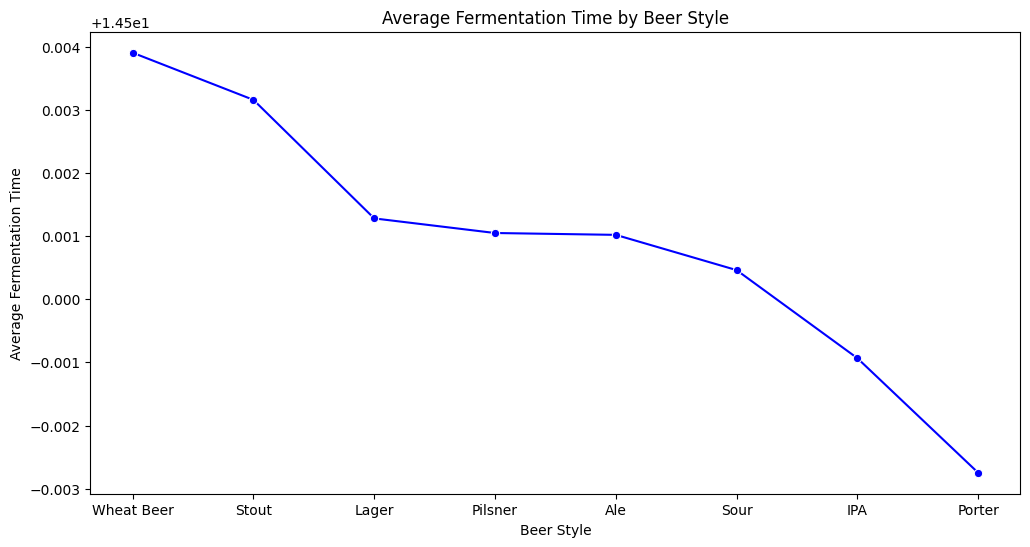

In [18]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import psutil

# Measure memory usage and computation time
start_time = time.time()

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = average_fermentation_time_by_style.toPandas()

# Check the column names in the Pandas DataFrame
print(pandas_df.columns)

# Ensure the correct column name is used in the groupby function
fermentation_by_style = pandas_df.groupby('Beer_Style')['Average_Fermentation_Time'].mean().reset_index()
fermentation_by_style = fermentation_by_style.sort_values(by='Average_Fermentation_Time', ascending=False)

# Print the result
print(fermentation_by_style)

# Plot using Matplotlib
plt.figure(figsize=(12, 6))
line = sns.lineplot(x='Beer_Style', y='Average_Fermentation_Time', data=fermentation_by_style, marker='o', color='blue')
plt.xlabel('Beer Style')
plt.ylabel('Average Fermentation Time')
plt.title('Average Fermentation Time by Beer Style')
plt.xticks(rotation=0)

end_time = time.time()
loss_time = end_time - start_time
memory = psutil.Process()
loss_memory = memory.memory_info().rss / (1024 ** 2)

print("\nMemory usage:", loss_memory, "MB")
print("Computation Time:", loss_time, "seconds")

### Fermentation Time by Beer Style

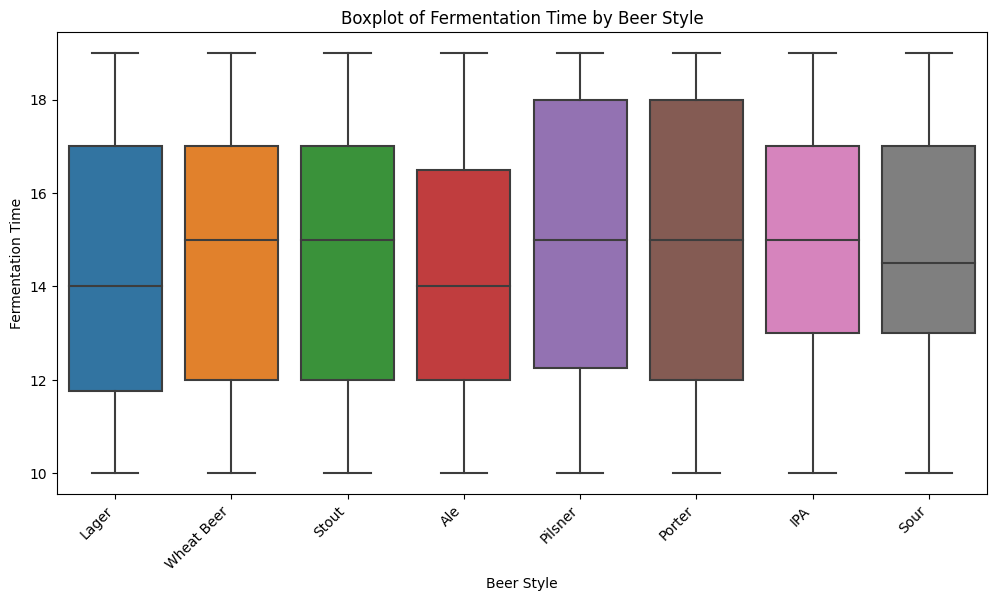


Memory usage: 220.65234375 MB
Computation Time: 47.033284187316895 seconds


In [17]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import seaborn as sns
import psutil
import time

# Measure memory usage and computation time
start_time = time.time()

# Create a Spark session
spark = SparkSession.builder.appName("BeerAnalysis").getOrCreate()

selected_columns = ["Beer_Style", "Fermentation_Time"]
filtered_data = brewery_df.select(selected_columns).filter(col("Fermentation_Time").isNotNull())

# Sample a fraction of the data (adjust fraction as needed)
sampled_data = filtered_data.sample(fraction=0.0001, seed=42)

# Convert PySpark DataFrame to Pandas for visualization
pandas_df = sampled_data.toPandas()

# Plot the boxplot using Matplotlib and Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='Beer_Style', y='Fermentation_Time', data=pandas_df)
plt.title('Boxplot of Fermentation Time by Beer Style')
plt.xlabel('Beer Style')
plt.ylabel('Fermentation Time')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

end_time = time.time()
execution_time = end_time - start_time
memory = psutil.Process()
used_memory = memory.memory_info().rss / (1024 ** 2)

print("\nMemory usage:", used_memory, "MB")
print("Computation Time:", execution_time, "seconds")



### Correlation between the fermentation time, temperature, pH level, gravity, and quality score.

In [19]:
import time
import psutil
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
from pyspark.sql import SparkSession

# Measure memory usage and computation time
start_time = time.time()

# Create a Spark session
spark = SparkSession.builder.appName("BeerAnalysis").getOrCreate()

selected_columns = ["Fermentation_Time", "Temperature", "pH_Level", "Gravity", "Quality_Score"]

# Create a vector assembler
vector_assembler = VectorAssembler(inputCols=selected_columns, outputCol="features")

# Transform the DataFrame to include the feature vector
assembled_df = vector_assembler.transform(brewery_df)

# Calculate the correlation matrix
correlation_matrix = Correlation.corr(assembled_df, "features").head()

# Show the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix[0])

end_time = time.time()
loss_time = end_time - start_time
memory = psutil.Process()
loss_memory = memory.memory_info().rss / (1024 ** 2)

print("\nMemory usage:", loss_memory, "MB")
print("Computation Time:", loss_time, "seconds")

Correlation Matrix:
DenseMatrix([[ 1.00000000e+00,  1.97820560e-04,  9.49539720e-05,
               3.47360261e-04, -4.12240460e-05],
             [ 1.97820560e-04,  1.00000000e+00, -4.65083587e-04,
               1.98194253e-04,  2.66338493e-04],
             [ 9.49539720e-05, -4.65083587e-04,  1.00000000e+00,
               2.85203876e-04,  2.89187187e-04],
             [ 3.47360261e-04,  1.98194253e-04,  2.85203876e-04,
               1.00000000e+00,  2.88235175e-04],
             [-4.12240460e-05,  2.66338493e-04,  2.89187187e-04,
               2.88235175e-04,  1.00000000e+00]])

Memory usage: 216.1015625 MB
Computation Time: 78.82638359069824 seconds


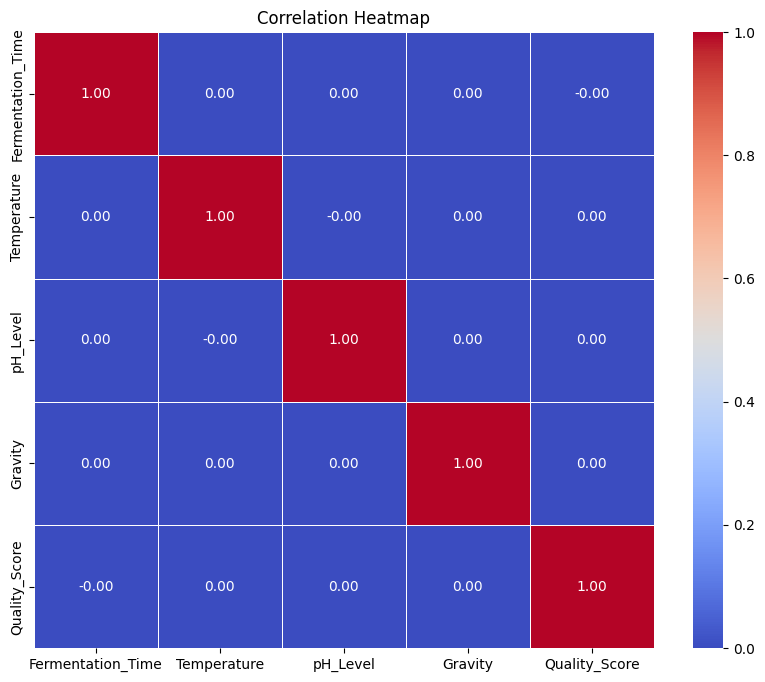


Memory usage: 222.515625 MB
Computation Time: 0.26532959938049316 seconds


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import time
import psutil
# Measure memory usage and computation time
start_time = time.time()


# Extract the correlation matrix values
corr_values = correlation_matrix[0].toArray()

# Create a DataFrame for the correlation matrix
corr_matrix_df = pd.DataFrame(corr_values, columns=selected_columns, index=selected_columns)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

end_time = time.time()
loss_time = end_time - start_time
memory = psutil.Process()
loss_memory = memory.memory_info().rss / (1024 ** 2)

print("\nMemory usage:", loss_memory, "MB")
print("Computation Time:", loss_time, "seconds")

### Total Sales by Beer Style

+--------+----------+----------+-------+---------------+-----------------+------------------+------------------+------------------+-----------------+----------+-----+----------------+---------------+------------------+-----------------+--------------------+-------------------+------------------------+----------------------------+
|Batch_ID| Brew_Date|Beer_Style|    SKU|       Location|Fermentation_Time|       Temperature|          pH_Level|           Gravity|  Alcohol_Content|Bitterness|Color|Ingredient_Ratio|Volume_Produced|       Total_Sales|    Quality_Score|Brewhouse_Efficiency|Loss_During_Brewing|Loss_During_Fermentation|Loss_During_Bottling_Kegging|
+--------+----------+----------+-------+---------------+-----------------+------------------+------------------+------------------+-----------------+----------+-----+----------------+---------------+------------------+-----------------+--------------------+-------------------+------------------------+----------------------------+
| 78

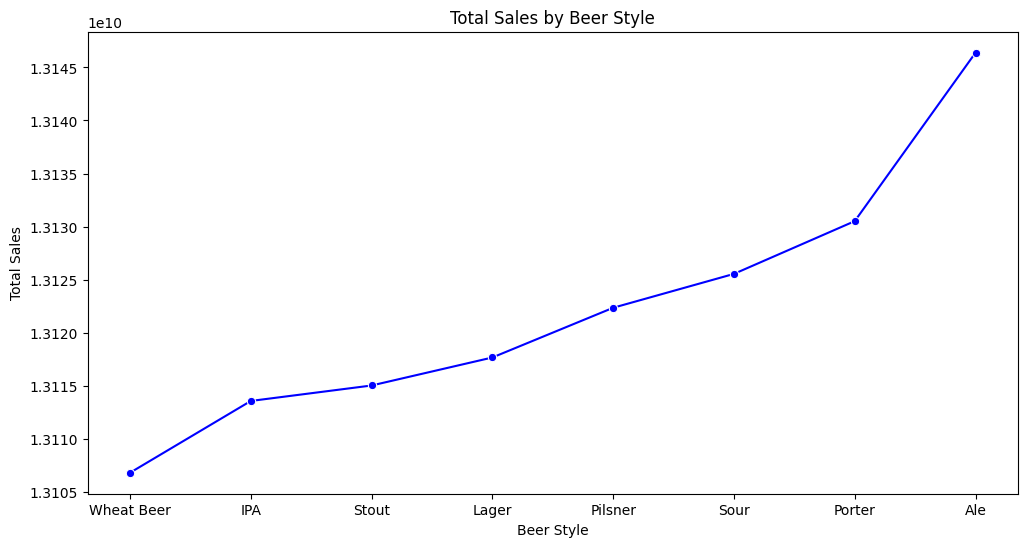


Memory usage: 228.1796875 MB
Computation Time: 20.969558000564575 seconds


In [21]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum, col
import matplotlib.pyplot as plt
import seaborn as sns
import time
import psutil
# Measure memory usage and computation time
start_time = time.time()

# Create a Spark session
spark = SparkSession.builder.appName("BeerAnalysis").getOrCreate()

# Check the exact column names in your dataset
brewery_df.show()

# Assuming the correct column name is "Total_Sales"
selected_columns = ["Beer_Style", "Total_Sales"]

# Group by beer style and calculate the total sales
total_sales_by_style = brewery_df.groupBy("Beer_Style").agg(sum(col("Total_Sales")).alias("Total_Sales"))


# Convert the PySpark DataFrame to Pandas for visualization
total_sales_pd = total_sales_by_style.toPandas()

# Sort the DataFrame
total_sales_pd = total_sales_pd.sort_values(by='Total_Sales', ascending=True)

# Create a line plot
plt.figure(figsize=(12, 6))
line2 = sns.lineplot(x='Beer_Style', y='Total_Sales', data=total_sales_pd, marker='o', color='blue')
plt.xlabel('Beer Style')
plt.ylabel('Total Sales')
plt.title('Total Sales by Beer Style')
plt.xticks(rotation=0)
plt.show()

end_time = time.time()
loss_time = end_time - start_time
memory = psutil.Process()
loss_memory = memory.memory_info().rss / (1024 ** 2)

print("\nMemory usage:", loss_memory, "MB")
print("Computation Time:", loss_time, "seconds")

### Total Loss by Beer Style

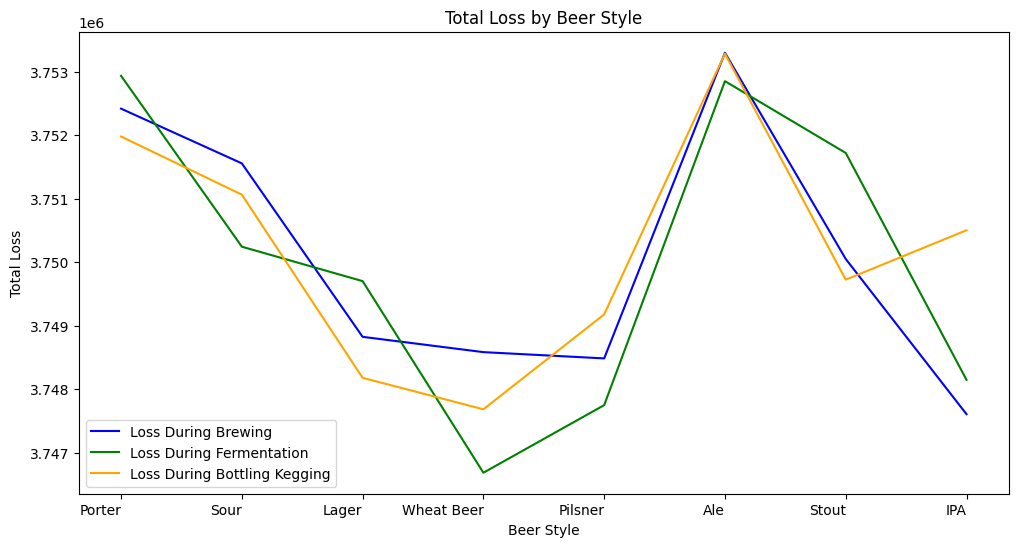


Memory usage: 233.21875 MB
Computation Time: 27.439659595489502 seconds


In [22]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum, col
import matplotlib.pyplot as plt
import time
import psutil
# Measure memory usage and computation time
start_time = time.time()


# Create a Spark session
spark = SparkSession.builder.appName("BeerAnalysis").getOrCreate()

# Assuming the correct column names for loss are "Loss_During_Brewing", "Loss_During_Fermentation", and "Loss_During_Bottling_Kegging"
selected_columns_loss = ["Beer_Style", "Loss_During_Brewing", "Loss_During_Fermentation", "Loss_During_Bottling_Kegging"]

# Group by beer style and calculate the total loss
total_loss_by_style = brewery_df.groupBy("Beer_Style").agg(
    sum(col("Loss_During_Brewing")).alias("Total_Loss_During_Brewing"),
    sum(col("Loss_During_Fermentation")).alias("Total_Loss_During_Fermentation"),
    sum(col("Loss_During_Bottling_Kegging")).alias("Total_Loss_During_Bottling_Kegging")
)

# Convert PySpark DataFrame to Pandas for visualization
total_loss_by_style_pandas = total_loss_by_style.toPandas()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(total_loss_by_style_pandas['Beer_Style'], total_loss_by_style_pandas['Total_Loss_During_Brewing'], label='Loss During Brewing', color='blue')
plt.plot(total_loss_by_style_pandas['Beer_Style'], total_loss_by_style_pandas['Total_Loss_During_Fermentation'], label='Loss During Fermentation', color='green')
plt.plot(total_loss_by_style_pandas['Beer_Style'], total_loss_by_style_pandas['Total_Loss_During_Bottling_Kegging'], label='Loss During Bottling Kegging', color='orange')

plt.xlabel('Beer Style')
plt.ylabel('Total Loss')
plt.title('Total Loss by Beer Style')
plt.xticks(rotation=0, ha='right')
plt.legend()
plt.show()


end_time = time.time()
loss_time = end_time - start_time
memory = psutil.Process()
loss_memory = memory.memory_info().rss / (1024 ** 2)

print("\nMemory usage:", loss_memory, "MB")
print("Computation Time:", loss_time, "seconds")

## Asking and Answering Questions




#### Q1:  Which beer style has the highest average quality score?

In [23]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, col
import time
import psutil
# Measure memory usage and computation time
start_time = time.time()

# Create a Spark session
spark = SparkSession.builder.appName("BeerAnalysis").getOrCreate()

# Group by beer style and calculate the average quality score
average_quality_by_style = brewery_df.groupBy("Beer_Style").agg(avg(col("Quality_Score")).alias("Average_Quality_Score"))

# Find the beer style with the highest average quality score
highest_quality_style = average_quality_by_style.orderBy(col("Average_Quality_Score").desc()).first()

print("Beer Style with the Highest Average Quality Score:")
print(highest_quality_style)

end_time = time.time()
loss_time = end_time - start_time
memory = psutil.Process()
loss_memory = memory.memory_info().rss / (1024 ** 2)

print("\nMemory usage:", loss_memory, "MB")
print("Computation Time:", loss_time, "seconds")

Beer Style with the Highest Average Quality Score:
Row(Beer_Style='Sour', Average_Quality_Score=8.001141937089582)

Memory usage: 233.47265625 MB
Computation Time: 26.092206239700317 seconds


The beer style with the highest average quality score is "Sour" with an average quality score of approximately 8.00. This indicates that, on average, beers classified as "Sour" receive the highest quality ratings.

#### Q2:  What is the total volume produced for each location?

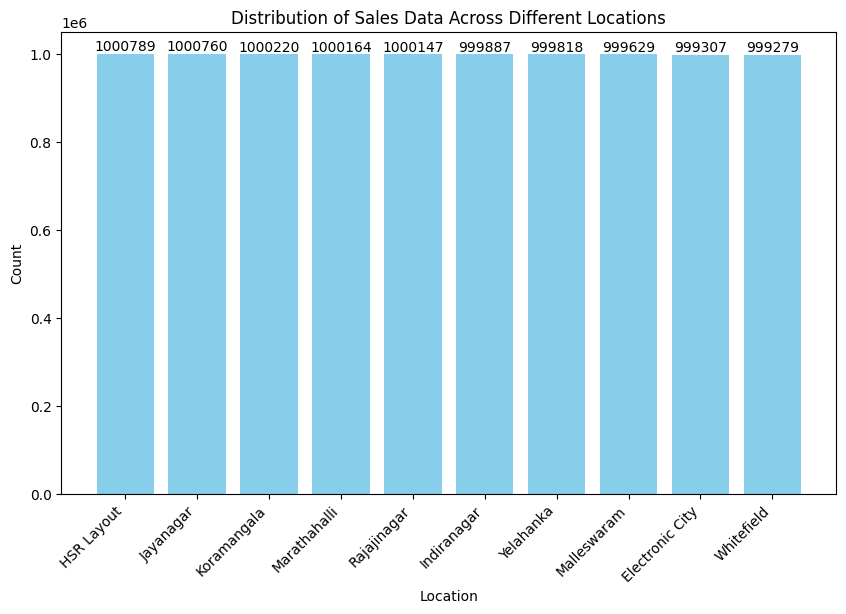


Memory usage: 235.75390625 MB
Computation Time: 16.331711292266846 seconds


In [24]:
import time
import psutil
# Measure memory usage and computation time
start_time = time.time()

location_counts = brewery_df.groupBy("Location").count().orderBy("count", ascending=False).toPandas()
location_counts

# Plot the bar chart with count labels
plt.figure(figsize=(10, 6))
bars = plt.bar(location_counts["Location"], location_counts["count"], color='skyblue')
plt.title('Distribution of Sales Data Across Different Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")

# Add count labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

end_time = time.time()
loss_time = end_time - start_time
memory = psutil.Process()
loss_memory = memory.memory_info().rss / (1024 ** 2)

print("\nMemory usage:", loss_memory, "MB")
print("Computation Time:", loss_time, "seconds")

The volume produced is listed for various locations, with counts ranging from approximately 999,279 to 1,000,789. This analysis provides an overview of the total volume of beer produced at different locations. It can be used to assess the production scale and distribution across regions.

#### Q3: What is the relation between fermentation time and alcohol content?

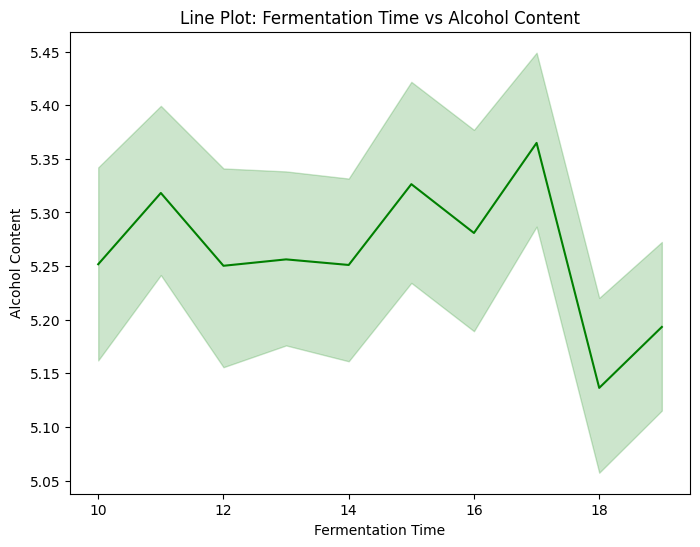


Memory usage: 223.80078125 MB
Computation Time: 30.488824605941772 seconds


In [19]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import seaborn as sns
import psutil
import time

# Measure memory usage and computation time
start_time = time.time()

# Create a Spark session
spark = SparkSession.builder.appName("BeerAnalysis").getOrCreate()

# Assuming your PySpark DataFrame is named brewery_df
selected_columns = ["Fermentation_Time", "Alcohol_Content"]
filtered_data = brewery_df.select(selected_columns).filter(
    col("Fermentation_Time").isNotNull() &
    col("Alcohol_Content").isNotNull()
)

# Sample a fraction of the data (adjust fraction as needed)
sampled_data = filtered_data.sample(fraction=0.0001, seed=42)

# Convert PySpark DataFrame to Pandas for visualization
pandas_df = sampled_data.toPandas()

# Sort the data by Fermentation_Time for a line plot
pandas_df = pandas_df.sort_values(by='Fermentation_Time')

# Plot the line plot using Matplotlib and Seaborn
plt.figure(figsize=(8, 6))
sns.lineplot(x='Fermentation_Time', y='Alcohol_Content', data=pandas_df, color='green')
plt.title('Line Plot: Fermentation Time vs Alcohol Content')
plt.xlabel('Fermentation Time')
plt.ylabel('Alcohol Content')
plt.show()

end_time = time.time()
execution_time = end_time - start_time
memory = psutil.Process()
used_memory = memory.memory_info().rss / (1024 ** 2)

print("\nMemory usage:", used_memory, "MB")
print("Computation Time:", execution_time, "seconds")



In [15]:
result_df.show()

+-----------------+-----------------+
|Fermentation_Time|  Alcohol_Content|
+-----------------+-----------------+
|               16|5.370842159553436|
|               13|5.096053082797625|
|               12|4.824737120959184|
|               17|5.509243080797997|
|               18|5.133624684263243|
|               10|4.859171021614226|
|               16|4.710402522822796|
|               13| 4.83702482975061|
|               18|5.133596661986578|
|               11|5.709899253603638|
|               14|5.460061910956435|
|               19|4.661066385691683|
|               14|4.516939869630938|
|               17|5.319366431771322|
|               17| 4.97381389280548|
|               10|4.535179745113896|
|               11| 5.12916808476057|
|               15|5.575448433172943|
|               15|5.406625556398892|
|               16|5.402760414393702|
+-----------------+-----------------+
only showing top 20 rows



The table shows the relation between fermentation time and alcohol content. For example, for a fermentation time of 16 units, the corresponding alcohol content is approximately 5.37. This provides insight into the potential relationship between these two variables.

#### Q4:  Which ingredient ratio is associated with the highest total sales?

In [8]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum
import time
import psutil
# Measure memory usage and computation time
start_time = time.time()

# Create a Spark session
spark = SparkSession.builder.appName("BeerAnalysis").getOrCreate()

selected_columns = ["Ingredient_Ratio", "Total_Sales"]
filtered_data = brewery_df.select(selected_columns).filter(col("Ingredient_Ratio").isNotNull() & col("Total_Sales").isNotNull())

# Group by ingredient ratio and calculate the total sales
total_sales_by_ratio = filtered_data.groupBy("Ingredient_Ratio").agg(sum("Total_Sales").alias("Total_Sales"))

# Find the ingredient ratio with the highest total sales
highest_sales_ratio = total_sales_by_ratio.orderBy(col("Total_Sales").desc()).first()["Ingredient_Ratio"]

print(f"The ingredient ratio associated with the highest total sales is: {highest_sales_ratio}")

end_time = time.time()
loss_time = end_time - start_time
memory = psutil.Process()
loss_memory = memory.memory_info().rss / (1024 ** 2)

print("\nMemory usage:", loss_memory, "MB")
print("Computation Time:", loss_time, "seconds")

The ingredient ratio associated with the highest total sales is: 1:0.41:0.20

Memory usage: 196.4296875 MB
Computation Time: 38.24022150039673 seconds


The ingredient ratio associated with the highest total sales is 1:0.41:0.20. This indicates that beers with this specific ratio of ingredients have achieved the highest total sales.

#### Q5:What is the average loss during brewing, fermentation, and bottling/kegging for each beer style?

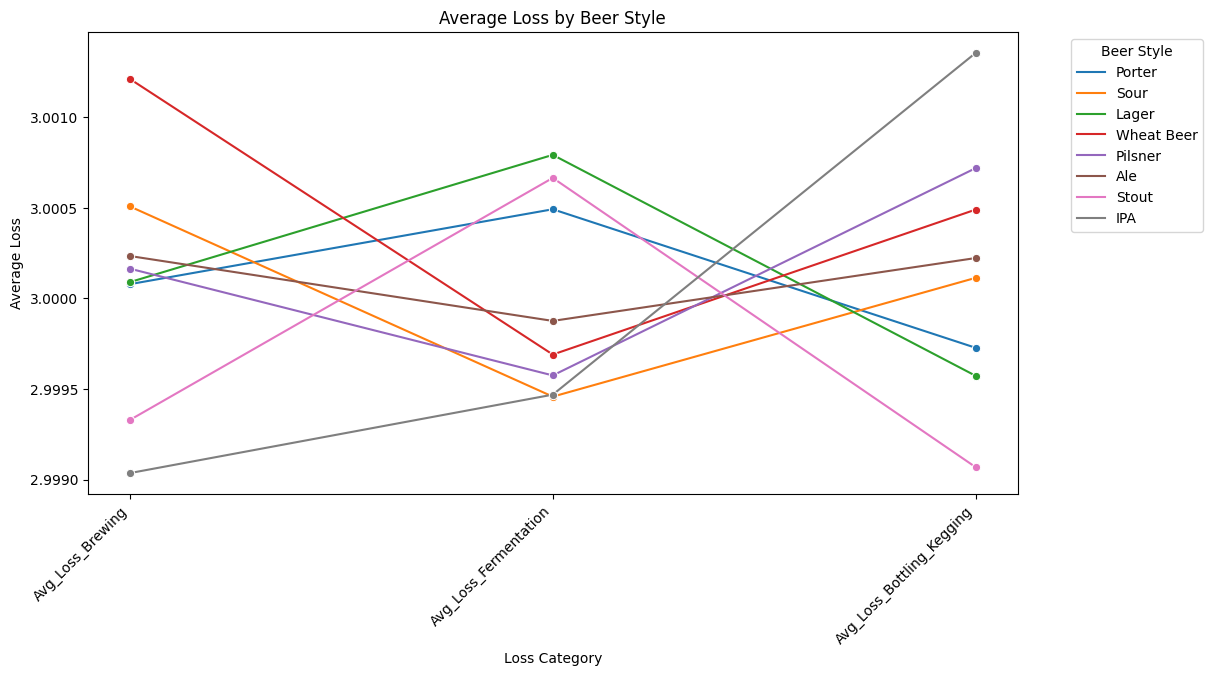


Memory usage: 201.6640625 MB
Computation Time: 56.94319486618042 seconds


In [9]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, mean
import matplotlib.pyplot as plt
import seaborn as sns
import time
import psutil
# Measure memory usage and computation time
start_time = time.time()

# Create a Spark session
spark = SparkSession.builder.appName("BeerAnalysis").getOrCreate()

selected_columns = ["Beer_Style", "Loss_During_Brewing", "Loss_During_Fermentation", "Loss_During_Bottling_Kegging"]
filtered_data = brewery_df.select(selected_columns).filter(
    col("Loss_During_Brewing").isNotNull() &
    col("Loss_During_Fermentation").isNotNull() &
    col("Loss_During_Bottling_Kegging").isNotNull()
)

# Group by beer style and calculate the average loss for each category
average_loss_by_style = filtered_data.groupBy("Beer_Style").agg(
    mean("Loss_During_Brewing").alias("Avg_Loss_Brewing"),
    mean("Loss_During_Fermentation").alias("Avg_Loss_Fermentation"),
    mean("Loss_During_Bottling_Kegging").alias("Avg_Loss_Bottling_Kegging")
)

# Convert PySpark DataFrame to Pandas for visualization
pandas_df = average_loss_by_style.toPandas()

# Plot the line plot using Matplotlib and Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=pandas_df.melt(id_vars="Beer_Style"), x="variable", y="value", hue="Beer_Style", marker='o')
plt.title('Average Loss by Beer Style')
plt.xlabel('Loss Category')
plt.ylabel('Average Loss')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Beer Style', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

end_time = time.time()
loss_time = end_time - start_time
memory = psutil.Process()
loss_memory = memory.memory_info().rss / (1024 ** 2)

print("\nMemory usage:", loss_memory, "MB")
print("Computation Time:", loss_time, "seconds")


In [14]:
average_loss_by_style.show()

+----------+------------------+---------------------+-------------------------+
|Beer_Style|  Avg_Loss_Brewing|Avg_Loss_Fermentation|Avg_Loss_Bottling_Kegging|
+----------+------------------+---------------------+-------------------------+
|    Porter|3.0000789753029333|   3.0004924563714797|        2.999727871064935|
|      Sour| 3.000507764963783|   2.9994579030123716|       3.0001134775805314|
|     Lager|3.0000904101921217|   3.0007927088350295|        2.999573281040475|
|Wheat Beer| 3.001211377437426|   2.9996903077199515|        3.000490311978133|
|   Pilsner|3.0001641545725555|    2.999574985080767|       3.0007191063058567|
|       Ale|3.0002341688814953|   2.9998759595514364|       3.0002229529288145|
|     Stout| 2.999329668970689|   3.0006655259882717|       2.9990689837133964|
|       IPA| 2.999036000625665|   2.9994688963700935|       3.0013548799079595|
+----------+------------------+---------------------+-------------------------+



The table presents the average loss during different stages for each beer style. For instance, for the "Porter" style, the average loss during brewing is approximately 3.00, during fermentation is around 3.00, and during bottling/kegging is roughly 3.00. These values provide insights into the brewing process efficiency for each beer style.

## Inferences and Conclusion

**Q1 : Beer Style with the Highest Average Quality Score:**

The beer style "Sour" has the highest average quality score, with a score of approximately 8.00.


**Q2 : Total Volume Produced for Each Location:**

- HSR Layout and Jayanagar have the highest total volumes produced, both exceeding one million.
- Electronic City, Whitefield, and Malleswaram have relatively lower total volumes produced.



**Q3 : Relation Between Fermentation Time and Alcohol Content:**

The table provides a snapshot of the fermentation time and alcohol content for various combinations. It appears that there is no clear linear trend between fermentation time and alcohol content. Further analysis or visualization may be needed for a detailed understanding.

**Q4 : Ingredient Ratio Associated with the Highest Total Sales:**

The ingredient ratio "1:0.41:0.20" is associated with the highest total sales.

**Q5 : Average Loss During Brewing, Fermentation, and Bottling/Kegging for Each Beer Style:**

Each beer style has associated average loss values during brewing, fermentation, and bottling/kegging. The values provide insights into the efficiency of the brewing process for each beer style.

**Conclusion:**

- The quality score analysis indicates that "Sour" is perceived as the highest-quality beer style on average.
- Location-wise production analysis helps identify the key production hubs and areas with lower production volumes.
- The relationship between fermentation time and alcohol content requires further exploration, possibly through visualization techniques.
- The ingredient ratio associated with the highest total sales provides valuable information for product optimization.
- Understanding average losses for each beer style helps in process improvement and quality control.


## References and Future Work

**References:**

[Kaggle](https://www.kaggle.com/datasets)

[Github](https://github.com/apache/spark/tree/master/python/pyspark)


**Future Work:**

1. Conduct a more in-depth analysis of the relationship between fermentation time and alcohol content, possibly using advanced statistical methods or machine learning techniques.
2. Explore the impact of different ingredient ratios on various brewing parameters, including taste, aroma, and market demand.
3. Investigate external factors influencing beer quality and production, such as seasonal variations, raw material quality, or changes in consumer preferences.
4. Implement predictive modeling to forecast production volumes and optimize inventory management.
